## Step-1 : Problem Statement :
  - To find the employee attrition rate by using the given satisfaction_level,promotion_last_5years,salary,last_evaluation,number_project,average_montly_hours,sales,time_spend_company,Work_accident

## Step-2 :  Import libraries and Load the data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HR_comma_sep.csv.txt')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.shape

(14999, 10)

In [4]:
data['left'].unique()

array([1, 0], dtype=int64)

## Step-3 : Data cleaning & Data Preprocessing

In [5]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<Axes: >

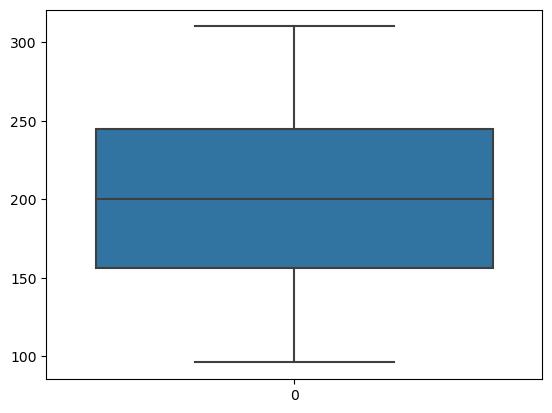

In [7]:
sns.boxplot(data['average_montly_hours'])

In [8]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
dic = {'low': 0 ,  'medium' : 1 , 'high' : 2}
dic

{'low': 0, 'medium': 1, 'high': 2}

In [11]:
data['salary'] = data['salary'].replace(dic)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [13]:
data['sales'] = le.fit_transform(data['sales'])

In [14]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.72,0.87,5,223,5,0,1,0,7,0
4,0.37,0.52,2,159,3,0,1,0,7,0


In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [16]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [17]:
cols_to_rep = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years','sales', 'salary'] 

In [18]:
data[cols_to_rep] = ss.fit_transform(data[cols_to_rep])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,1,-0.147412,0.393725,-0.933368
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,1,-0.147412,0.393725,0.636092
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,1,-0.147412,0.393725,0.636092
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,1,-0.147412,0.393725,-0.933368
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,1,-0.147412,0.393725,-0.933368


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          14999 non-null  float64
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  float64
 8   sales                  14999 non-null  float64
 9   salary                 14999 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.1 MB


## Step-4 : Seperate X and y

In [20]:
X = data.drop('left',axis=1)
y = data['left']

## Step-5 : Split X and y into train test set

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Step-6 : Apply KNN Classifier on X_train and y_train

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc

KNeighborsClassifier()

In [23]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

## Step-7 : Perform Predictions on the X_test data

In [24]:
y_pred = knc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [25]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
6723,0.149490,1.424944,0.971113,0.499578,-1.026126,2.432112,-0.147412,-0.303457,0.636092
6473,1.074587,0.490165,-0.651538,-0.701829,-1.026126,-0.411165,-0.147412,-2.046413,-0.933368
4679,0.310376,1.541791,-0.651538,0.259297,-1.026126,-0.411165,-0.147412,0.393725,-0.933368
862,-0.815830,-1.437818,-1.462863,-0.942110,-0.341235,-0.411165,-0.147412,0.393725,-0.933368
7286,1.034366,0.256470,0.971113,1.060235,-1.026126,2.432112,-0.147412,-1.000639,-0.933368
...,...,...,...,...,...,...,...,...,...
3297,-0.011397,0.139622,-1.462863,-1.162368,1.713436,-0.411165,-0.147412,0.393725,0.636092
14113,1.275696,1.015978,-0.651538,1.080259,2.398327,2.432112,-0.147412,0.393725,0.636092
5514,0.672371,-0.619886,-0.651538,-0.161196,-0.341235,-0.411165,-0.147412,0.393725,0.636092
9939,1.114809,0.256470,-1.462863,1.540798,-1.026126,-0.411165,-0.147412,0.393725,0.636092


## Step-8 : Compare y_pred and y_test to get accuracy of the model

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9536666666666667

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knc_1 = KNeighborsClassifier(n_neighbors=1)
knc_1

KNeighborsClassifier(n_neighbors=1)

In [47]:
knc_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
y_pred_1 = knc_1.predict(X_test)

In [49]:
accuracy_score(y_pred_1, y_test)

0.9693333333333334

In [50]:
## By default the distance is calculated based on Euclidean distance only

from sklearn.neighbors import KNeighborsClassifier
knc_md = KNeighborsClassifier(n_neighbors=1,p=1)   # p is used to define distance formula
knc_md                                             # p = 1 => Manhattan distance,p = 2 => Euclidean distance

KNeighborsClassifier(n_neighbors=1, p=1)

In [51]:
knc_md.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [52]:
y_pred_md = knc_md.predict(X_test)

In [53]:
accuracy_score(y_pred_md,y_test)

0.9686666666666667

## Conclusion
 - When n_neighbors=1 it gives 97% accuracy whether the distance is manhattan or Euclidean
 - When n_neighbors=5 or general ,it gives 95% accuracy